In [ ]:
%matplotlib inline

In [ ]:
import argparse

from fastai.conv_learner import *

In [ ]:
from dataloader import PartDataset
from pointnet import PointNetDenseCls2

In [ ]:
num_points = 512
data_dir = 'E:/PROJECTS/NTUT/PointNet/pointnet1_pytorch/DATA/Shapenet/shapenetcore_partanno_segmentation_benchmark_v0'
trn_ds = PartDataset(root=data_dir, npoints=num_points, classification=False, class_choice=['Airplane'])
val_ds = PartDataset(root=data_dir, npoints=num_points, classification=False, class_choice=['Airplane'], train=False)
num_classes = 5

trn_dl = DataLoader(trn_ds, batch_size=4, shuffle=True, num_workers=0, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=0, pin_memory=True)
tes_dl = None

model_data = ModelData('DATA/Shapenet/shapenetcore_partanno_segmentation_benchmark_v0', trn_dl, val_dl)

In [5]:
model = PointNetDenseCls2(num_points=num_points, k=num_classes)

optimizer = optim.Adam
criterion = F.cross_entropy
learner = Learner(model_data, BasicModel(to_gpu(model)), opt_fn=optimizer, crit=criterion)

 61%|███████████████████████████████████████████▌                           | 330/538 [02:37<01:28,  2.36it/s, loss=3.47]

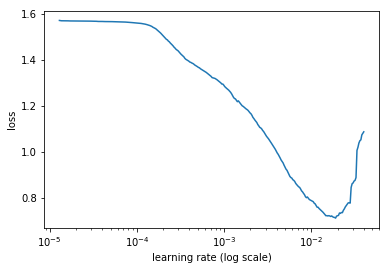

In [6]:
learner.lr_find()
learner.sched.plot()

In [8]:
lr = 5e-3
learner.fit(lrs=lr, n_cycle=2, cycle_len=1)

epoch      trn_loss   val_loss                                                                                           
    0      0.383028   0.362196  
    1      0.317155   0.305389                                                                                           


[array([0.30539])]

In [11]:
# pred_logits, y = learner.TTA(is_test=False) # is_test=False -> test on validation dataset; is_test=True -> test on test dataset
pred_log = learner.predict(is_test=False)

In [14]:
pred_labels = np.argmax(pred_log, axis=1)
pred_probs = np.exp(pred_log) # measure probability values
acc = accuracy_np(preds=pred_probs, targs=model_data.val_ds.targs) # evaluate accuracy(only available on valid dataset)
metrics.log_loss(y_true=model_data.val_y, y_pred=pred_probs) # evaluate error(only available on valid dataset)

NameError: name 'y' is not defined

In [30]:
pred_logits, y = learner.TTA(is_test=False)

AttributeError: 'ModelData' object has no attribute 'aug_dl'